In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
amsterdam = pd.read_csv('/content/HousingPrices-Amsterdam-August-2021.csv')
amsterdam.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


## **DATA ANALYSIS**

In [ ]:
amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [ ]:
amsterdam = amsterdam.drop(['Unnamed: 0'], axis=1)

In [ ]:
amsterdam.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
amsterdam.isnull().sum()

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [ ]:
amsterdam.shape

(924, 7)

In [ ]:
amsterdam['Price'].fillna(amsterdam['Price'].mean(), inplace=True)

In [ ]:
amsterdam.isnull().sum()

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [ ]:
amsterdam.describe()

,Price,Area,Room,Lon,Lat
count,9.240000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.378250e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.690000e+05,83.000000,3.000000,4.886818,52.364631
75%,6.992500e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


<ipython-input-24-b5a0001e5c14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = amsterdam.corr()


<Axes: >

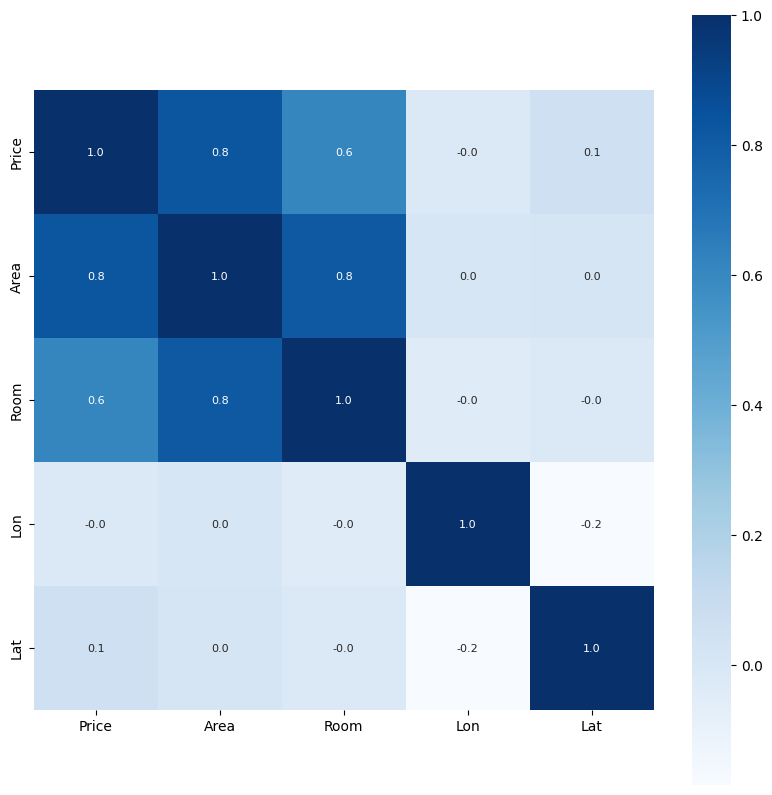

In [ ]:
correlation = amsterdam.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', cmap='Blues', annot=True, annot_kws={'size':8})

## **Splitting the data into (features and target) and (test and train) datasets**

In [ ]:
x = amsterdam.drop(['Price', 'Address', 'Zip'], axis=1)
y = amsterdam['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=3)

Training the model

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## **Model Evaluation**

In [ ]:
prediction = model.predict(x_train)
scoret1 = metrics.r2_score(prediction, y_train)
scoret2 = metrics.mean_absolute_error(prediction, y_train)
print(f'The R squared error : {scoret1} (training data)')
print(f'The Mean absolute error : {scoret2} (training data)')

The R squared error : 0.9992895328840953 (training data)
The Mean absolute error : 10126.651562581752 (training data)


In [ ]:
prediction2 = model.predict(x_test)
scorete1 = metrics.r2_score(prediction2, y_test)
scorete2 = metrics.mean_absolute_error(prediction2, y_test)
print(f'The R squared error : {scorete1} (test data)')
print(f'The Mean absolute error : {scorete2} (test data)')

The R squared error : 0.9169269512460314 (test data)
The Mean absolute error : 95514.4689676835 (test data)


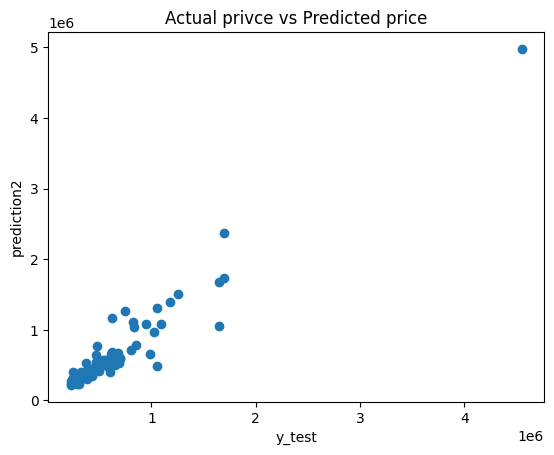

In [ ]:
plt.scatter(y_test, prediction2)
plt.xlabel('y_test')
plt.ylabel('prediction2')
plt.title("Actual privce vs Predicted price")
plt.show()

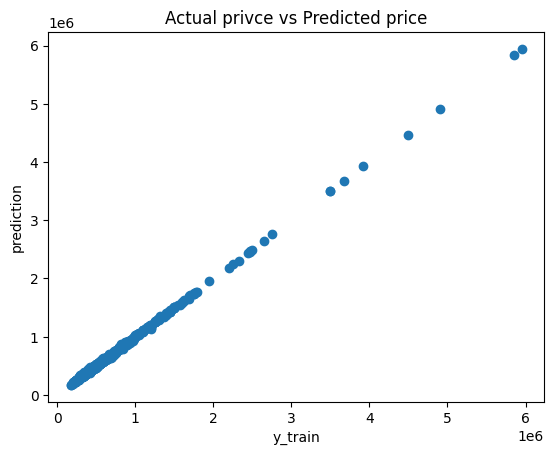

In [ ]:
plt.scatter(y_train, prediction)
plt.xlabel('y_train')
plt.ylabel('prediction')
plt.title("Actual privce vs Predicted price")
plt.show()

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(x_train, y_train)

LinearRegression()

In [ ]:
prediction3 = model2.predict(x_train)
scorelt1 = metrics.r2_score(prediction3, y_train)
scorelt2 = metrics.mean_absolute_error(prediction3, y_train)
print(f'The R squared error : {scorelt1} (training data)')
print(f'The Mean absolute error : {scorelt2} (training data)')

The R squared error : 0.5163012244222878 (training data)
The Mean absolute error : 182322.49908340565 (training data)


In [ ]:
prediction4 = model2.predict(x_test)
scorelte1 = metrics.r2_score(prediction4, y_test)
scorelte2 = metrics.mean_absolute_error(prediction4, y_test)
print(f'The R squared error : {scorelte1} (test data)')
print(f'The Mean absolute error : {scorelte2} (test data)')

The R squared error : 0.8064211055482012 (test data)
The Mean absolute error : 147494.4352646339 (test data)


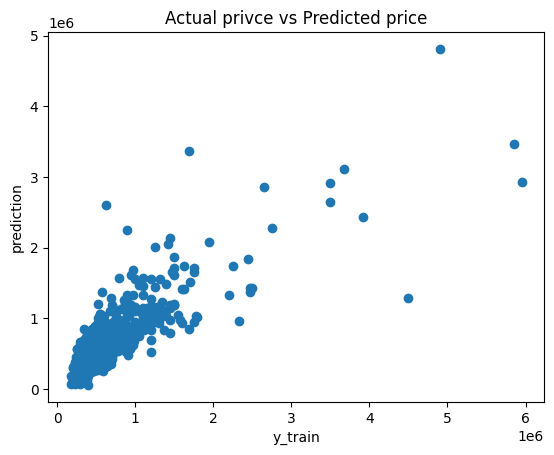

In [ ]:
plt.scatter(y_train, prediction3)
plt.xlabel('y_train')
plt.ylabel('prediction')
plt.title("Actual privce vs Predicted price")
plt.show()

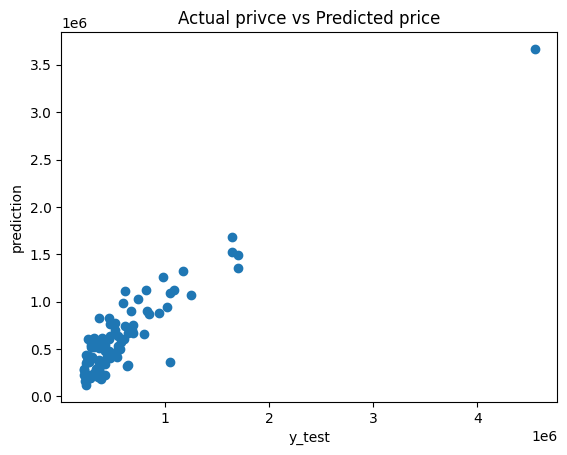

In [ ]:
plt.scatter(y_test, prediction4)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.title("Actual privce vs Predicted price")
plt.show()